



# <center> Machine Learning and Statistics Project</center>





![title](Images/image1.jpg)

# <center> Topic: Create a Web Service That Makes Predictions</center>

### Project Overview

In this project you must create a web service that uses machine learning to make predictions based on the data set powerproduction. The goal is to produce a model that accurately predicts wind turbine power output from wind speed values, as in the data set. You must then develop a web service that will respond with predicted power values based on speed values sent as HTTP requests. 

### Project Requirements

**Your submission must be in the form of a git repository containing, at a minimum, the following items:**

1. Jupyter notebook that trains a model using the data set. In the notebook you should explain your model and give an analysis    of its accuracy.
2. Python script that runs a web service based on the model, as above.
3. Dockerfile to build and run the web service in a container.
4. Standard items in a git repository such as a README.
5. Can add more than one model if you like. 

### Getting Started

**What is the Powerproduction Dataset?**

We will base our model on values which we are given in a dataset, wind turbine power output from wind speed values. Wind energy has emerged as a promising alternative source for overcoming the energy crisis in the world, and will help reduce the carbon footprint. Wind Power is a rapidly growning renewable energy source, this will only continue to grow due to concerns about climate warming. 

The uncertain nature of wind and high penetration of wind energy in power systems are a big challenge to the reliability and stability of these systems. To make wind energy a reliable source, accurate models for predicting the power output and performance monitoring of wind turbines are needed. We will create models below based on the values we already have, train the algorithm, and if a different wind speed is given, what will the that power output be. So basically, will forecast how much power you will use when the wind is a certain speed.


Source(Smart Energy)![title](Images/image3.jpg)



### Import Libraries

First we will **import libraries**, these are built in packages in Python which we will be using for our project. 

In [1]:
# Import packages 

import sklearn.neighbors as nei # sub package from scikitlearn.

# Need to import specific package with Scikitlearn.

import pandas as pd # Data structures and operations for manipulating numerical tables and time series.

import numpy as np # Fundamental package for array computing with Python.

import random # Returns random values.

import seaborn as sns # Data Visualization Library. 

import matplotlib.pyplot as plt# Creates a plotting area in a figure, plots some lines in a plotting area, adds labels.

# Magic function in IPython, function that renders the figure in a notebook.
%matplotlib inline

import scipy.stats as ss # Calculates the arithmetic mean of the array elements along the specified axis of the array.

from sklearn.linear_model import LinearRegression

from sklearn.model_selection import train_test_split

### Pandas 

For data manipulation and analysis of our dataset.

In [2]:
# import dataset
ds = pd.read_csv("./powerproduction.csv")

In [3]:
# display contents
ds

,speed,power
0,0.000,0.0
1,0.125,0.0
2,0.150,0.0
3,0.225,0.0
4,0.275,0.0
...,...,...
495,24.775,0.0
496,24.850,0.0
497,24.875,0.0
498,24.950,0.0


In [4]:
# Locates data row two through eight.
ds.loc[2:8]

,speed,power
2,0.150,0.000
3,0.225,0.000
4,0.275,0.000
5,0.325,4.331
6,0.400,5.186
7,0.450,3.826
8,0.501,1.048


In [5]:
# Gives acess and outputs data on your index from row two. Index displayed on left side, numbers the rows.
# iloc is position of rows
# loc gets you index
ds.iloc[2]

speed    0.15
power    0.00
Name: 2, dtype: float64

In [6]:
# Finds individual cell
ds.at[5, 'speed']

0.325

### Summary Stats

In [7]:
ds.describe()

,speed,power
count,500.000000,500.000000
mean,12.590398,48.014584
std,7.224991,41.614572
min,0.000000,0.000000
25%,6.324750,5.288000
50%,12.550500,41.645500
75%,18.775250,93.537000
max,25.000000,113.556000


Average speed and power.

In [8]:
ds.mean()

speed    12.590398
power    48.014584
dtype: float64

In [9]:
# SELECT FROM ds WHERE speed >= 24 
ds[(ds['speed'] >= 24)]

,speed,power
481,24.024,105.992
482,24.049,93.524
483,24.174,95.869
484,24.199,101.419
485,24.249,103.700
486,24.299,93.694
487,24.349,93.078
488,24.374,98.223
489,24.399,95.117
490,24.499,0.000


Lets find out some information on our variables. 

In [10]:
# max speed
maxs = ds["speed"]
max_value = maxs.max()
print(max_value)

25.0


In [11]:
# min speed
min = ds["speed"]
min_value = min.min()
print(min_value)

0.0


In [12]:
# max power
maxs = ds["power"]
max_value = maxs.max()
print(max_value)

113.556


In [13]:
# min speed
min = ds["power"]
min_value = min.min()
print(min_value)

0.0


In [14]:
sp = ds[(ds['speed'] >= 0) & (ds['speed'] <= 3)]
print(ds)

      speed  power
0     0.000    0.0
1     0.125    0.0
2     0.150    0.0
3     0.225    0.0
4     0.275    0.0
..      ...    ...
495  24.775    0.0
496  24.850    0.0
497  24.875    0.0
498  24.950    0.0
499  25.000    0.0

[500 rows x 2 columns]


### Cleaning Data

We can see from avove that some of the values for wind speed at 2kph generate zero to six or seven ouputs, and others generate higher speed outputs of 14. This needs to be cleaned up.

https://medium.com/@rrfd/cleaning-and-prepping-data-with-python-for-data-science-best-practices-and-helpful-packages-af1edfbe2a3

### Visualize your data-set with Seaborn.

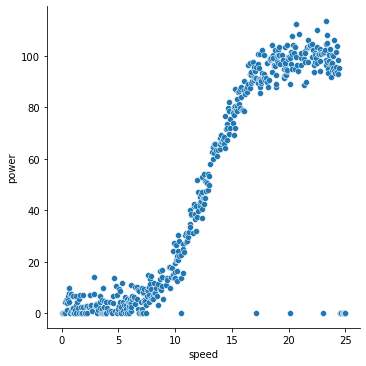

In [15]:
# Plot values for ds
sns.relplot(x="speed", y="power", data=ds); 

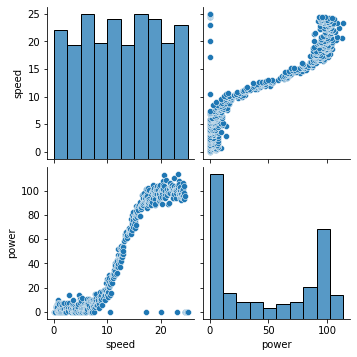

In [16]:
# Import Seaborn Package. Sometimes Jupyter can be a bit finicky with Seborn,
# May need to run it twice.
# plot the data with a pair plot
sns.pairplot(ds)

### Train your model 

Function and Models
Create a function that can take an input x, and will have previously trained a list of values p, that help us make predictions, if the input is x, what is the output.

When you combine the input x, with the values in p, you have an algorithm that says yes or no.

In [17]:
# Takes two arguments, x is input for function,
# and p, which will be a list of values, that have been trained somehow on a dataset.

def f(x, p): 
    return p[0] + x * p[1] # 1st element in p (list), + x (input) * second value of p.

### Analysis
- Train a simple model.

We willl use Power production dataset, consisting of 2 variables, wind and speed. 

We have to come up with a function that predicts the power generated from wind speed. 

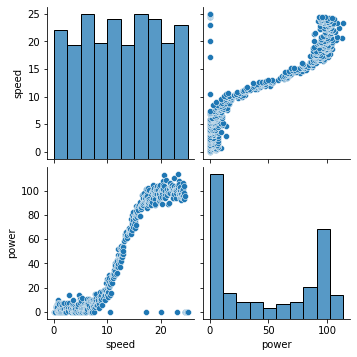

In [18]:
# Plot data
sns.pairplot(ds)

<AxesSubplot:xlabel='speed', ylabel='power'>

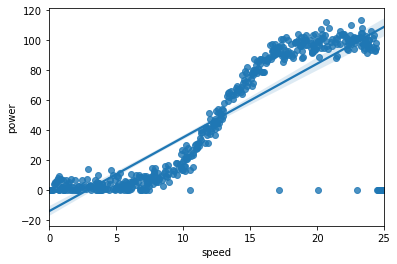

In [19]:

# Pick out two variables.
power = ds[["speed", "power"]].dropna()
# Scatter and fit line for just those two variables.
sns.regplot(x="speed", y="power", data=ds)

We can see that it is very similar to the plot above. The line gives you the best accuracy, and the shading at the top, gives you the impression that their is more uncertainty at the top than the bottom.

- Train
So now we try and come up with the parameters for the line, and make predictions of power gen from x input(wind speed).

In [20]:

# Manipulating two lists of numbers, one x and one y.
x = power["speed"].to_numpy()
y = power["power"].to_numpy()
x = x.reshape(-1, 1)


model = LinearRegression() # scikit learn gets the numbers for the line above on linear graph, and use linear regression.

model.fit(x, y) # gives body mass and flipper length values
r = model.score(x, y) # then ask whas the r value on the dataset
p = [model.intercept_, model.coef_[0]] # when x is zero where does y cut the axis, model.coef is the coefficient of x.

#### We ask what was the fit like?

**R-Value**

The relationship between two variables is generally considered strong when their r value is larger than 0.7. The correlation r measures the strength of the linear relationship between two quantitative variables.

In [21]:
r

0.7289360258564073

**What was the coefficient?**

In [22]:
p

[-13.89990263051962, 4.917595665404669]

So we can see that -13.9 seems to be the absolute minimum power we would expect.

The second part of the data states that for km you go up in wind speed, it seems to add 5 extra ouptuts in power. So if you go up 1 kph in wind speed, you will get around 4.9 outputs of power generated.

**Predict**

Now we call f, our fuction, and ask if we had a wind speed at 11 kph, what would it's power generated be?

In [23]:
# Based on the p from training the model.
f(11.0, p)

40.193649688931735

Go up 1 kph in wind speed from 11 to 12, shuld generate power to 45.

In [24]:
f(12.0, p)

45.111245354336404

In [25]:
# SELECT FROM ds WHERE speed >= 24 
ds[(ds['speed'] >= 10)]

,speed,power
195,10.035,16.139
196,10.085,20.709
197,10.110,26.427
198,10.135,12.624
199,10.160,16.474
...,...,...
495,24.775,0.000
496,24.850,0.000
497,24.875,0.000
498,24.950,0.000


We can see here that our training model was not far off.

In [26]:
o = ds[(ds['speed'] >= 11) & (ds['speed'] <= 12)]
print(ds)

      speed  power
0     0.000    0.0
1     0.125    0.0
2     0.150    0.0
3     0.225    0.0
4     0.275    0.0
..      ...    ...
495  24.775    0.0
496  24.850    0.0
497  24.875    0.0
498  24.950    0.0
499  25.000    0.0

[500 rows x 2 columns]


### Summary
You have to think about functions, not a lot to get in terms of calculations in Machine Learning & Statistics. It's the ideas in terms of what the calculations mean in the real world that are important. The functions takes two inputs, one that you give it and the other was the data from the dataset we trained it on. P might only change if we got a lot wind values and added them in, and the linear line might change then.

### Train Your Model using KNN

Here we will use KNN (K-Nearest Neighbours) to train our model. 

K Nearest Neighbor(KNN) is a very simple, easy to understand, versatile and one of the topmost machine learning algorithms. KNN used in the variety of applications such as finance, healthcare, political science, handwriting detection, image recognition and video recognition. In Credit ratings, financial institutes will predict the credit rating of customers. In loan disbursement, banking institutes will predict whether the loan is safe or risky. In political science, classifying potential voters in two classes will vote or won’t vote. KNN algorithm used for both classification and regression problems. KNN algorithm based on feature similarity approach. You can read up and find out <a href="https://www.datacamp.com/community/tutorials/k-nearest-neighbor-classification-scikit-learn">here</a> a more detailed expalanation of how the algorithm works, and what code is to be applied when using this algorithm. (Datacamp, 2018)

KNN works by finding the distances between a query and all the examples in the data, selecting the specified number examples (K) closest to the query, then votes for the most frequent label (in the case of classification) or averages the labels (in the case of regression). It is a process of sorting a given set of data into each different class. 

**Classification** can be implemented on both kinds of data structured as well as unstructured. Classes are often referred to as labels or targets which hold different classes. For example, classifying different fruits. 

**Regression** analysis is done for one of two purposes: In order to predict the value of the dependent variable for individuals for whom some information concerning the explanatory variables is available, or in order to estimate the effect of some explanatory variable on the dependent variable. (Analytic Steps, 2020)

### K-Nearest Neighbours



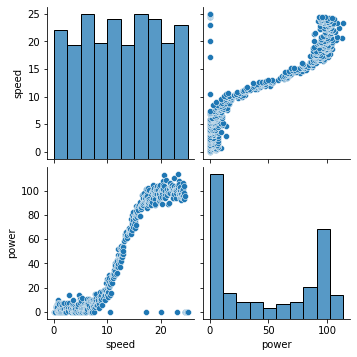

In [27]:
# Plot data
sns.pairplot(ds)

Visualize our dataset on a plot.

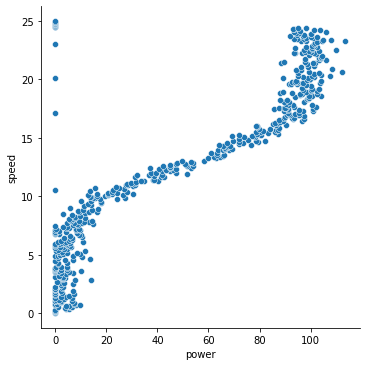

In [28]:
# Plot values for ds
sns.relplot(x="power", y="speed", data=ds);

### Predict
- Take the two varibles in the columns (speed and power) and take those two values and predict the power that will be generated from a wind speed, that a given set of values relate to.
- Going to use the algorithm to build up a model, to predict the power from a certain speed.
- If you come across a new wind speed, can go to your KNN algorithm and test the new values, and hopefully KNN algorithm will be able to predict what power will be generated, based on the set of values from the data-set it has seen before.

### Loading inputs and outputs.
-The idea here is to train the algorithm to know the power, so that if you come along with a new wind speed it will be able to tell you what kind of power will be ouptut, based on it's previous values in the dataset.

In [32]:
# Select column names from the dataframe.
inputs = ds[['speed']] # Create new variable called inputs, from df speed
# Species column
outputs = ds[['power']] # Create variable called outputs from df col, power.

**Call inputs**

In [33]:
# Values from speed column.
inputs # shows all the inputs you asked from the function above.

,speed
0,0.000
1,0.125
2,0.150
3,0.225
4,0.275
...,...
495,24.775
496,24.850
497,24.875
498,24.950


**Call Outputs**

In [34]:
# Values from speed column.
outputs # shows all the inputs you asked from the function above.

,power
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0
...,...
495,0.0
496,0.0
497,0.0
498,0.0


### Classifier
Create the classifier and fits it to our data-set, and predict.

How to <a href="https://www.datacamp.com/community/tutorials/k-nearest-neighbor-classification-scikit-learn">train</a> K Nearest Neighbours classifier in sklearn.

In KNN, K is the number of nearest neighbors. The number of neighbors is the core deciding factor. K is generally an odd number if the number of classes is 2. When K=1, then the algorithm is known as the nearest neighbor algorithm. (Datacamp, 2020)

### Fit
- Train the classifier on your dataset.
- Give it the inputs for which you know the outputs, you're going to fit that.
- Tells KNN the data, and asks it to build a model.
- Based on what each flower looks like, and in the future, be able to predict.

### Summary

### References

Datacamp, KNN, 2018, viewed on the 2019/12/17, available online at:https://www.datacamp.com/community/tutorials/k-nearest-neighbor-classification-scikit-learn

Analytic Steps, 2020, viewed on the 2019/12/17, available online at: https://www.analyticssteps.com/blogs/how-does-k-nearest-neighbor-works-machine-learning-classification-problem



### The End